In [100]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import numpy as np

In [101]:
train_dir = r"C:\Users\HP\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
val_dir = r"C:\Users\HP\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [102]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle= True,
    image_size=(200,200),
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    validation_split=None,
    subset=None,
    interpolation="bilinear", 
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [103]:
val_data= tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    image_size= (200,200),
    labels= 'inferred',
    color_mode='rgb',
    batch_size=32,
    validation_split=None,
    subset=None,
    interpolation="bilinear", 
    follow_links=False,
    crop_to_aspect_ratio=False
    
    
)

Found 17572 files belonging to 38 classes.


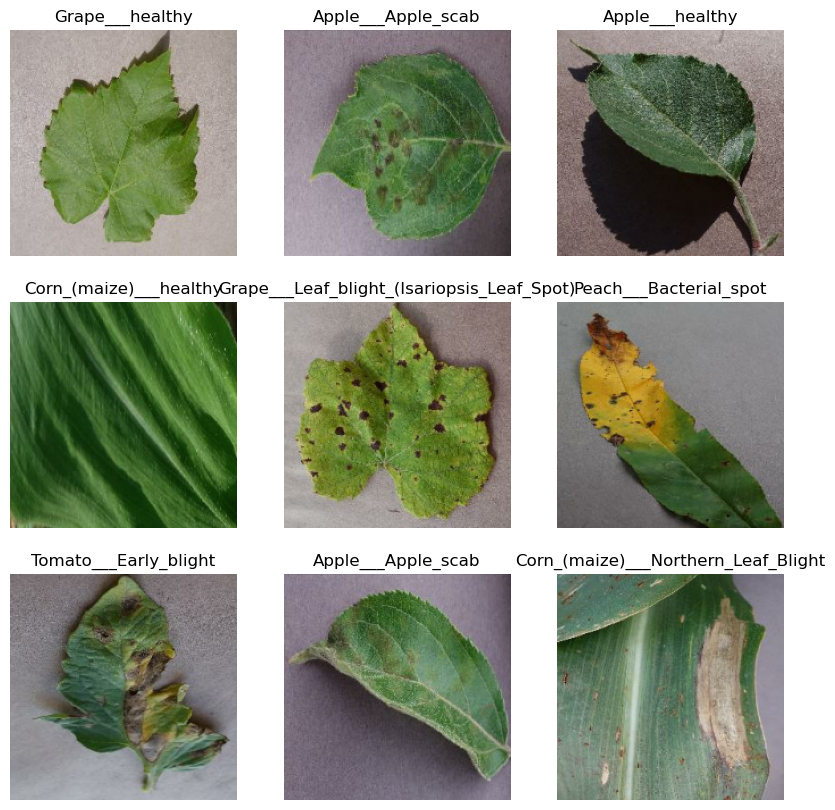

In [104]:
plt.figure(figsize=(10,10))
for image, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(categories[labels[i]])
        plt.axis('off')

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # `num_classes` is the number of disease categories
])




In [109]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [111]:
history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1642s 747ms/step - accuracy: 0.0865 - loss: 3.3977 - val_accuracy: 0.2283 - val_loss: 2.8328
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1598s 727ms/step - accuracy: 0.3695 - loss: 2.2414 - val_accuracy: 0.7820 - val_loss: 0.7370
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1606s 731ms/step - accuracy: 0.7442 - loss: 0.8445 - val_accuracy: 0.8122 - val_loss: 0.6248
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1572s 716ms/step - accuracy: 0.8466 - loss: 0.4959 - val_accuracy: 0.8560 - val_loss: 0.4825
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1608s 732ms/step - accuracy: 0.8890 - loss: 0.3614 - val_accuracy: 0.8701 - val_loss: 0.4502
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1573s 716ms/step - accuracy: 0.9126 - loss: 0.2898 - val_accuracy: 0.8491 - val_loss: 0.5371
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1557s 709ms/step - accuracy: 0.9257 - loss: 0.2477 - val_accuracy: 0.8701 - val_loss: 0.5096
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1587s 722ms/s

# model evaluation

In [112]:
train_loss, train_acc = model.evaluate(train_data)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 288s 131ms/step - accuracy: 0.9792 - loss: 0.0733


In [113]:
print(train_loss,train_acc)

0.06606163084506989 0.9813215732574463


In [114]:
val_loss, val_acc = model.evaluate(val_data)

550/550 ━━━━━━━━━━━━━━━━━━━━ 72s 130ms/step - accuracy: 0.8525 - loss: 0.6137


In [115]:
print(val_loss,val_acc)

0.6113957166671753 0.8514682650566101


In [116]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │      34,669,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,345,396 (398.05 MB)

 Trainable params: 34,781,798 (132.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,563,598 (265.36 MB)

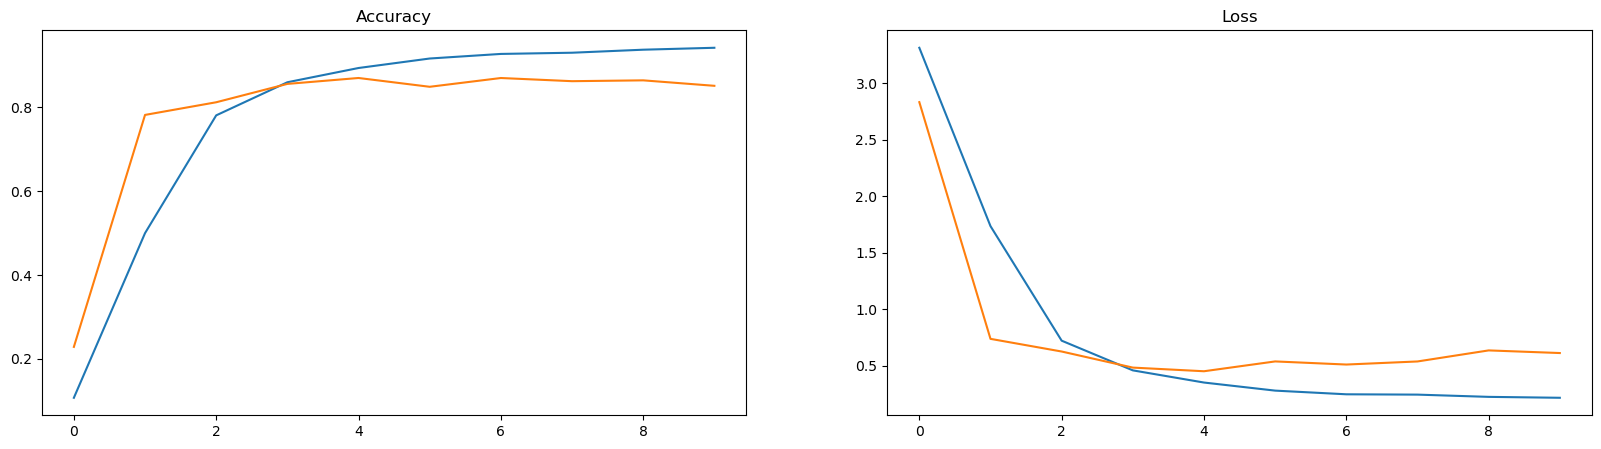

In [118]:
epochs_range=range(epochs_size)
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label= 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label= 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label= 'Validation Loss')
plt.title('Loss')
plt.show()